In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from fit import gee
from fit import mixed_effects as me
from IPython.display import Markdown as md, display

# Preberi podatke


In [3]:
df=pd.read_csv('./data/article.csv')
df.loc[df['gender'] == 'Man', ['gender']] = 'moški'
df.loc[df['gender'] == 'Woman', ['gender']] = 'ženska'

# Model z mešanimi učinki
Uporaba dvokomonentnega cosinor. Prikaz intervalov zaupanja za ocenjene parametre ritma in povzetek naučenega modela.

                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       hrv        
No. Observations:       9591          Method:                   REML       
No. Groups:             119           Scale:                    524.4995   
Min. group size:        1             Log-Likelihood:           -43782.3793
Max. group size:        588           Converged:                No         
Mean group size:        80.6                                               
---------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
---------------------------------------------------------------------------
Intercept                      43.849    2.596  16.889 0.000  38.760 48.937
gender[T.ženska]                0.351    3.058   0.115 0.909  -5.642  6.345
ss1                             7.204    0.723   9.968 0.000   5.788  8.621
gender[T.ženska]:ss1           

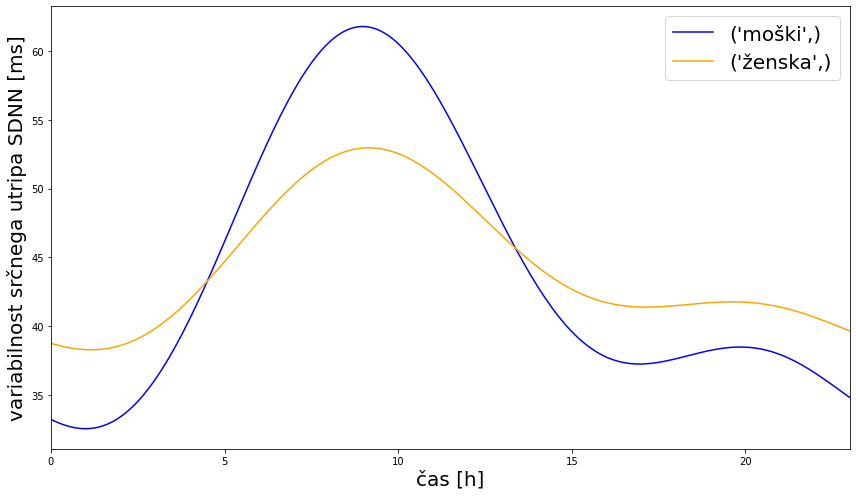

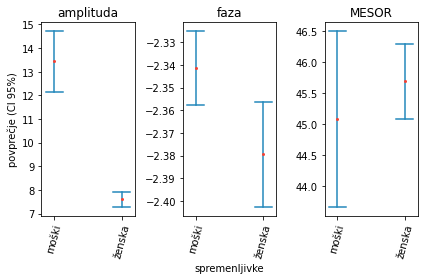

,amplitude,acrophase,mesor,locs,heights,parameter
0,14.63,-2.358553,47.16,[9.01],[61.78],"(moški,)"
1,7.34,-2.384759,45.61,"[9.11, 19.62]","[52.96, 41.76]","(ženska,)"


,parameter,amplitude,std_amplitude,amplitude_CIs,acrophase,std_acrophase,acrophase_CIs,mesor,std_mesor,mesor_CIs
0,moški,13.44,2.92,"[7.72, 19.16]",-2.34,0.04,"[-2.41, -2.27]",45.08,3.24,"[38.74, 51.42]"
1,ženska,7.6,0.74,"[6.15, 9.06]",-2.38,0.05,"[-2.48, -2.28]",45.69,1.38,"[42.98, 48.4]"


In [7]:
df1=me.me_cosinor(df, 'hrv', 'Hour_of_Day', 'participant_id', variables=['gender'],random_var='T0toT14',n_components=2,save_to='./results/demo/me_example.png',summary=True)
df2=me.calculate_confidence_intervals_parameters(df, 'hrv', 'Hour_of_Day', 'participant_id', variables=['gender'],random_var='T0toT14',n_components=2,save_to='./results/demo/me_example_ci.png')
display(df1)
display(df2)

# Primerjava uporabe naključnega učinka

                               GEE Regression Results                              
Dep. Variable:                         hrv   No. Observations:                 9591
Model:                                 GEE   No. clusters:                      119
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                 588
Family:                           Gaussian   Mean cluster size:                80.6
Dependence structure:         Exchangeable   Num. iterations:                     6
Date:                     Wed, 14 Feb 2024   Scale:                         677.335
Covariance type:                    robust   Time:                         09:35:18
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               43.5934      2.973     14.663      0.000  

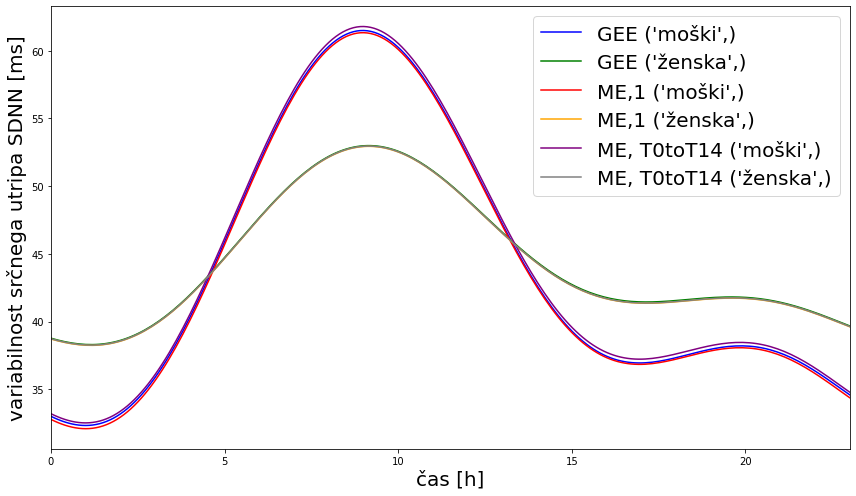

,amplitude,acrophase,mesor,locs,heights,parameter
0,14.58,-2.358553,46.91,[9.01],[61.49],"(moški,)"
1,7.34,-2.384759,45.65,"[9.11, 19.62]","[52.99, 41.82]","(ženska,)"


,amplitude,acrophase,mesor,locs,heights,parameter
0,14.61,-2.358553,46.71,[9.01],[61.33],"(moški,)"
1,7.34,-2.384759,45.59,"[9.11, 19.62]","[52.94, 41.74]","(ženska,)"


,amplitude,acrophase,mesor,locs,heights,parameter
0,14.63,-2.358553,47.16,[9.01],[61.78],"(moški,)"
1,7.34,-2.384759,45.61,"[9.11, 19.62]","[52.96, 41.76]","(ženska,)"


In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df3=gee.gee_cosinor(df, 'hrv', 'Hour_of_Day', 'participant_id', variables=['gender'],n_components=2,save_to='./results/demo/rnd.png',ax=ax,fit_label='GEE ',summary=True)
df4=me.me_cosinor(df, 'hrv', 'Hour_of_Day', 'participant_id',variables=['gender'],random_var='1',n_components=2,save_to='./results/demo/rnd.png',summary=True,ax=ax,fit_label='ME,1 ',prod=2)
df5=me.me_cosinor(df, 'hrv', 'Hour_of_Day', 'participant_id', variables=['gender'],random_var='T0toT14',n_components=2,save_to='./results/demo/rnd.png',summary=True,ax=ax,fit_label='ME, T0toT14 ',prod=4)
ax.set_ylabel('variabilnost srčnega utripa SDNN [ms]',fontsize=20)
ax.legend(fontsize=20)
fig.tight_layout()
fig.savefig('./results/demo/demo_all.pdf')
plt.show()
display(df3)
display(df4)
display(df5)